**Scatter plot**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive') #import file from gg drive

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/fastfood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [4]:
df.isna().sum() #check missing value

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
mean_vit_a = round(df['vit_a'].mean(), 1)
mean_vit_c = round(df['vit_c'].mean(), 1)
mean_calcium = round(df['calcium'].mean(), 1)
mean_vit_a, mean_vit_c, mean_calcium #find mean

(18.9, 20.2, 24.9)

In [6]:
df['vit_a'].fillna(mean_vit_a, inplace=True)
df['vit_c'].fillna(mean_vit_c, inplace=True)
df['calcium'].fillna(mean_vit_a, inplace=True) #add mean in attribute is not found
df_cleaned = df.dropna(subset=['fiber', 'protein']) #delete missing value ex.null
df_cleaned

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,18.9,20.2,18.9,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,18.9,20.2,18.9,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,18.9,20.2,18.9,Other


In [7]:
df_cleaned.isna().sum() #check null again

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [8]:
from sklearn.cluster import KMeans
# Select the 'calories' column for clustering
X = df_cleaned[['calories']]

# Define the K-means model with 3 clusters (healthy and unhealthy)
kmeans = KMeans(n_clusters=2, random_state=42)

# Manually set the centroids
centroids = [[875],[292]] # Threshold value to distinguish healthy and unhealthy
kmeans.cluster_centers_ = centroids

# Fit the model
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df_cleaned['Cluster'] = cluster_labels

#check the cluster result and adjust to match our criterion
df_cleaned.loc[df_cleaned['calories'] <= 750, 'Cluster'] = 0 #adjust to healthy
df_cleaned.loc[df_cleaned['calories'] > 750 , 'Cluster'] = 1 #adjust to unhealthy


# Map cluster labels to 'Healthy' 'Normal' or 'Unhealthy' 
df_cleaned['classification'] = df_cleaned['Cluster'].map({0: 'Healthy', 1: 'Unhealthy'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-d8b538d475b2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels
<ipython-input-8-d8b538d475b2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['classification'] = df_cleaned['Cluster'].map({0: 'Healthy', 1: 'Un

In [14]:
# Print and save the result
df_cleaned.to_csv('fastfood_output.csv')
df_cleaned.sample(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,Cluster,classification
367,Subway,Footlong Veggie Patty,780,140,14,2.0,0.0,20,1600,112,16.0,16,46.0,30.0,20.0,70.0,Other,1,Unhealthy
424,Taco Bell,Smothered Burrito - Shredded Chicken,650,250,28,10.0,0.0,70,2230,67,8.0,4,34.0,18.9,20.2,18.9,Other,0,Healthy
231,Burger King,Garden Grilled Chicken Salad w/ Crispy Chicken...,450,220,24,7.0,0.0,85,1070,30,5.0,6,29.0,18.9,20.2,18.9,Other,0,Healthy
86,Sonic,Jr. Burger,340,150,17,6.0,1.0,35,640,34,1.0,6,15.0,2.0,4.0,6.0,Other,0,Healthy
470,Taco Bell,Doritos® Cheesy Gordita Crunch - Fiery,490,250,28,10.0,1.0,55,890,40,5.0,4,20.0,18.9,20.2,18.9,Other,0,Healthy
314,Subway,Footlong Black Forest Ham,580,80,10,2.0,0.0,40,1660,92,10.0,16,36.0,16.0,40.0,60.0,Other,0,Healthy
175,Arbys,Triple Decker Sandwich,1030,459,51,17.0,1.0,155,2940,83,5.0,19,62.0,18.9,20.2,18.9,Other,1,Unhealthy
514,Taco Bell,Fiesta Taco Salad-Steak,720,320,36,8.0,1.0,55,1340,70,8.0,8,28.0,18.9,20.2,18.9,Other,0,Healthy
280,Dairy Queen,Large Cheese Curds,1050,670,75,43.0,1.0,180,2210,52,0.0,30,43.0,18.9,20.2,18.9,Other,1,Unhealthy
129,Sonic,"All Beef Chicago Dog – 6""",430,180,20,7.0,0.0,40,2310,49,1.0,17,14.0,4.0,6.0,10.0,Other,0,Healthy


In [10]:
label_0 = df_cleaned[df_cleaned['Cluster']==0]
label_1 = df_cleaned[df_cleaned['Cluster']==1]

print("Cluster 0",len(label_0))
print("Cluster 1",len(label_1))


Cluster 0 420
Cluster 1 83


In [11]:
# Filter the data for items in cluster 0
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 0]

# Get the minimum and maximum values of cholesterol in cluster 1
min_cholesterol = cluster_0_data['calories'].min()
max_cholesterol = cluster_0_data['calories'].max()

# Print the minimum and maximum values of cholesterol in cluster 1
print("Minimum Calories in Cluster 0:", min_cholesterol)
print("Maximum Calories in Cluster 0:", max_cholesterol)

Minimum Calories in Cluster 0: 20
Maximum Calories in Cluster 0: 750


In [12]:
# Filter the data for items in cluster 0
cluster_1_data = df_cleaned[df_cleaned['Cluster'] == 1]

# Get the minimum and maximum values of cholesterol in cluster 1
min_cholesterol1 = cluster_1_data['calories'].min()
max_cholesterol1 = cluster_1_data['calories'].max()

# Print the minimum and maximum values of cholesterol in cluster 1
print("Minimum Calories in Cluster 1:", min_cholesterol1)
print("Maximum Calories in Cluster 1:", max_cholesterol1)

Minimum Calories in Cluster 1: 760
Maximum Calories in Cluster 1: 2430


<Axes: >

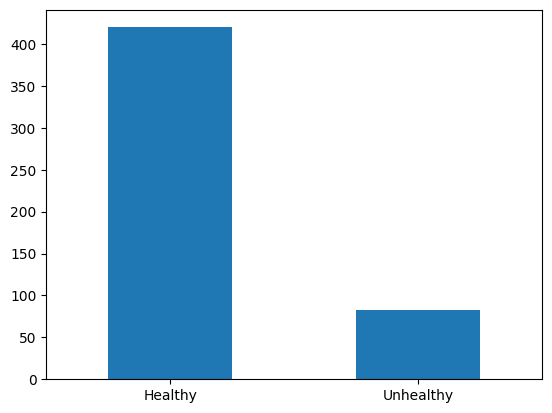

In [13]:
df_cleaned['classification'].value_counts().plot(kind='bar', rot=0)